In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

from EcmP_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [3]:


scaler_path = r"scaler\sp500_index_pct_spec_s\sp500_index_pct_spec_s_30_1.pkl"

"results\sp500_index_pct_spec_s_30_1_PatchTST_stock_custom_ftMS_sl30_ll2_pl1_dm128_dp64_pl5_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_dcomp0_kn25_LOlinears_None_rv1_close"


'results\n225_index_pct_spec_s_30_1_PatchTST_stock_custom_ftMS_sl30_ll2_pl1_dm256_dp64_pl5_nh4_el2_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_dcomp0_kn25_LOlinears_None_rv1_close'
'scaler\n225_index_pct_spec_s\n225_index_pct_spec_s_30_1.pkl'


path_common = r"results\sp500_index_pct_spec_s_30_1_PatchTST_stock_custom_ftMS_sl30_ll2_pl1_dm128_dp64_pl5_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0_dcomp0_kn25_LOlinears_None_rv1_close"

metrics_path = path_common + r'\metrics.npy'

pred_path = path_common + r'\pred.npy'

true_path = path_common + r'\true.npy'


# metrics_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

# pred_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

# true_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


metrics = np.load(metrics_path, allow_pickle=True)
print(metrics)

pred_raw = np.load(pred_path)
pred_raw = pred_raw.reshape((pred_raw.shape[0]))
pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
print(pred_raw[:10])
print(pred[:10])
print(pred.shape)
print(pred_raw.shape)

true_raw = np.load(true_path)
true_raw = true_raw.reshape((true_raw.shape[0]))
true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
print(true_raw[:10]) 
print(true[:10])
print(true.shape)
print(true_raw.shape)



[0.07381671 0.01394825 0.11810272 0.0269994  0.00280782 0.1675502
 0.14674759]
[2.588369  2.5761628 2.5401146 2.5438693 2.3633401 2.420507  2.3259726
 2.2972684 2.4059584 2.4441814]
[2783.7834 2778.7349 2763.825  2765.378  2690.7095 2714.354  2675.2537
 2663.3813 2708.3367 2724.146 ]
(544,)
(544,)
[2.549677  2.5209055 2.4841802 2.279664  2.3992696 2.2859256 2.2437603
 2.343806  2.4141867 2.483407 ]
[2767.78 2755.88 2740.69 2656.1  2705.57 2658.69 2641.25 2682.63 2711.74
 2740.37]
(544,)
(544,)


c:\Users\Vincent\.conda\envs\Pytorch_1_11\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
pred_raw.shape

(544,)

In [5]:
mae = MAE(pred, true)
mape = MAPE(pred, true)


In [6]:
print("MAE : {}".format(mae))
print("MAPE : %.10f"%(mape))

MAE : 30.531293869018555
MAPE : 0.0105030350


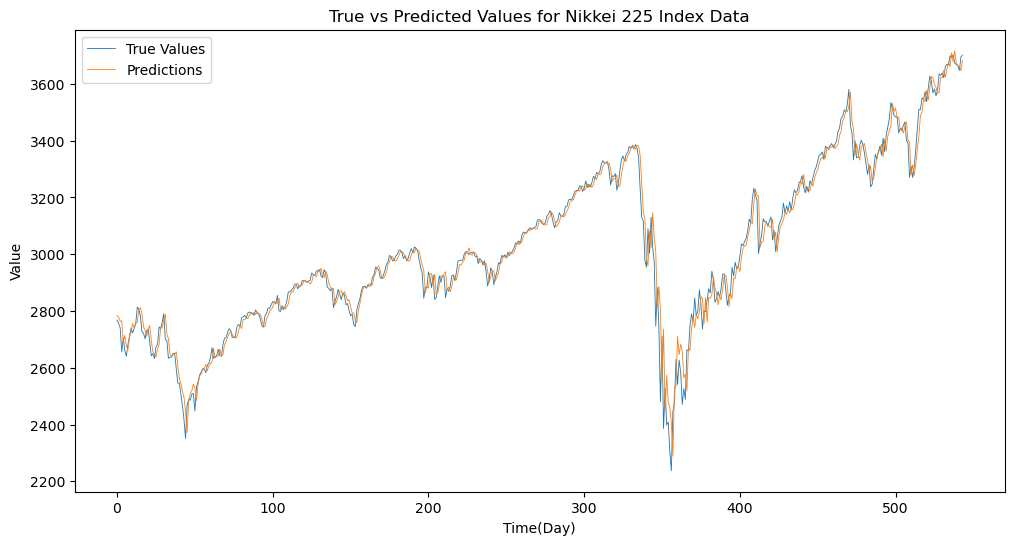

In [7]:
import matplotlib.pyplot as plt

time_axis = np.arange(len(pred))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true, label='True Values', linewidth=0.6)
plt.plot(time_axis, pred, label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for Nikkei 225 Index Data')
plt.legend()

plt.show()

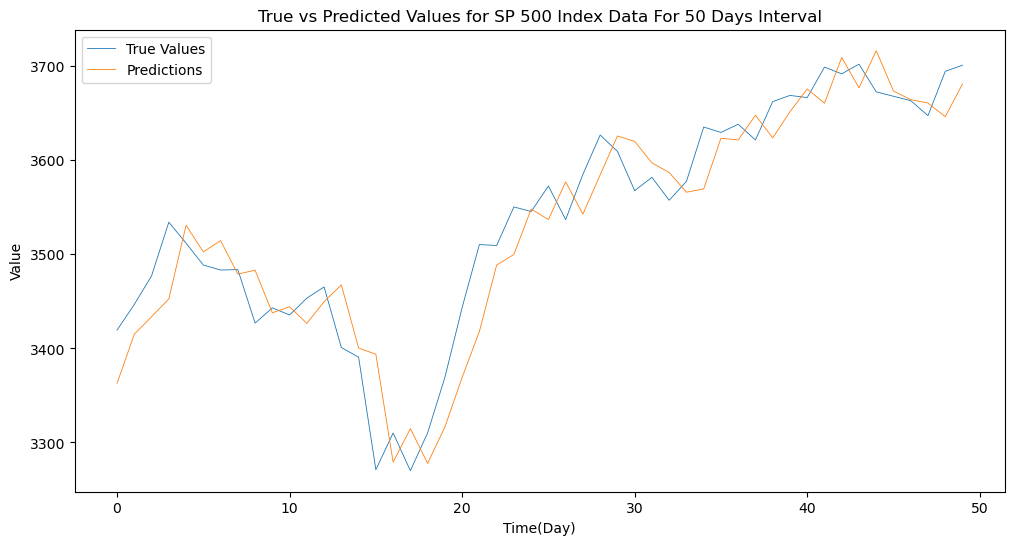

In [8]:
import matplotlib.pyplot as plt

last_value = 50

data_set = "SP 500"


time_axis = np.arange(len(pred[-last_value:]))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true[-last_value:], label='True Values', linewidth=0.6)
plt.plot(time_axis, pred[-last_value:], label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for {} Index Data For {} Days Interval'.format(data_set, last_value))
plt.legend()


plt.savefig("{}_{}.jpg".format(data_set, last_value), bbox_inches='tight', pad_inches=0.05)

plt.show()

In [ ]:
type(mae)

numpy.float32

In [ ]:
type(pred_raw)

numpy.ndarray

In [ ]:
import torch 

print(type(torch.tensor(5).double()))

print((torch.tensor(5).double()).dtype)

print(torch.Tensor([5.23, 24.32]).dtype)

torch.Tensor([5.23, 24.32]).to('cuda')


<class 'torch.Tensor'>
torch.float64
torch.float32


tensor([ 5.2300, 24.3200], device='cuda:0')